In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from torch.utils.data import TensorDataset


from project2_functions import *
from project2_objects import *
from project2_models import *
from project2_constants import DEVICE as device
from project2_constants import SEED

In [2]:
torch.manual_seed(SEED)
torch.set_default_dtype(torch.double)

## 2 Object Localization
#### First we load and inspect the localization datasets

In [3]:
loc_train = torch.load('data/localization_train.pt')
loc_val = torch.load('data/localization_val.pt')
loc_test = torch.load('data/localization_test.pt')

In [4]:
print(f'Train data size: {len(loc_train)}')
print(f'Val data size: {len(loc_val)}')
print(f'Test data size: {len(loc_test)}')

Train data size: 59400
Val data size: 6600
Test data size: 11000


In [5]:
first_img, first_label = loc_train[0]

print(f'Shape of first image: {first_img.shape}')
print(f'Type of first image: {type(first_img)}')

print(f'\nShape of first label: {first_label.shape}')
print(f'Type of first label: {type(first_label)})')
first_label

Shape of first image: torch.Size([1, 48, 60])
Type of first image: <class 'torch.Tensor'>

Shape of first label: torch.Size([6])
Type of first label: <class 'torch.Tensor'>)


tensor([1.0000, 0.6000, 0.2292, 0.3667, 0.4167, 4.0000], dtype=torch.float32)

In [6]:
count_instances(loc_train, 'Training Data')
count_instances(loc_val, 'Validation Data')
count_instances(loc_test, 'Test Data')

Class distribution in Training Data
0: 5345
1: 6075
2: 5365
3: 5522
4: 5243
5: 4889
6: 5310
7: 5644
8: 5249
9: 5358
99: 5400
Class distribution in Validation Data
0: 578
1: 667
2: 593
3: 609
4: 599
5: 532
6: 608
7: 621
8: 602
9: 591
99: 600
Class distribution in Test Data
0: 980
1: 1135
2: 1032
3: 1010
4: 982
5: 892
6: 958
7: 1028
8: 974
9: 1009
99: 1000


#### Plotting some images

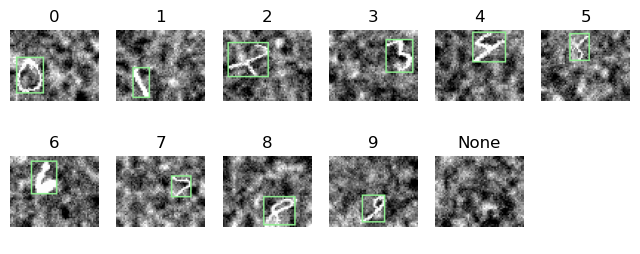

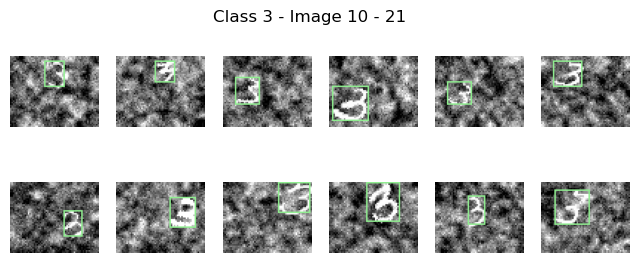

In [7]:
imgs = torch.stack([img for img,_ in loc_train])
labels = torch.stack([label for _,label in loc_train])

plot_localization_data(imgs, labels)
plot_localization_data(imgs, labels, class_label=3, start_idx=10)

#### Defining a normalizer and a preprocessor

In [8]:
loc_train_norm, loc_val_norm, loc_test_norm = normalizer(loc_train, loc_val, loc_test)

#### Defining models

In [9]:
n_epochs = 20
batch_size = 64
lr = 0.01
momentum = 0.9
decay= 0.001

In [10]:
train_loader = torch.utils.data.DataLoader(loc_train_norm, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(loc_val_norm, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(loc_test_norm, batch_size=batch_size, shuffle=False)

loss_fn = LocalizationLoss()

16:38:53  |  Epoch 1  |  Training loss 1.951
16:38:53  |  Epoch 1  |  Validation loss 1.204
Estimated time left: 4m 8s
16:39:05  |  Epoch 2  |  Training loss 0.796
16:39:05  |  Epoch 2  |  Validation loss 0.587
Estimated time left: 3m 52s
16:39:18  |  Epoch 3  |  Training loss 0.473
16:39:18  |  Epoch 3  |  Validation loss 0.465
Estimated time left: 3m 38s
16:39:31  |  Epoch 4  |  Training loss 0.360
16:39:31  |  Epoch 4  |  Validation loss 0.449
Estimated time left: 3m 25s
16:39:43  |  Epoch 5  |  Training loss 0.300
16:39:43  |  Epoch 5  |  Validation loss 0.444
Estimated time left: 3m 12s
16:39:56  |  Epoch 6  |  Training loss 0.256
16:39:56  |  Epoch 6  |  Validation loss 0.413
Estimated time left: 2m 59s
16:40:09  |  Epoch 7  |  Training loss 0.227
16:40:09  |  Epoch 7  |  Validation loss 0.417
Estimated time left: 2m 46s
16:40:22  |  Epoch 8  |  Training loss 0.206
16:40:22  |  Epoch 8  |  Validation loss 0.405
Estimated time left: 2m 33s
16:40:35  |  Epoch 9  |  Training loss 0.

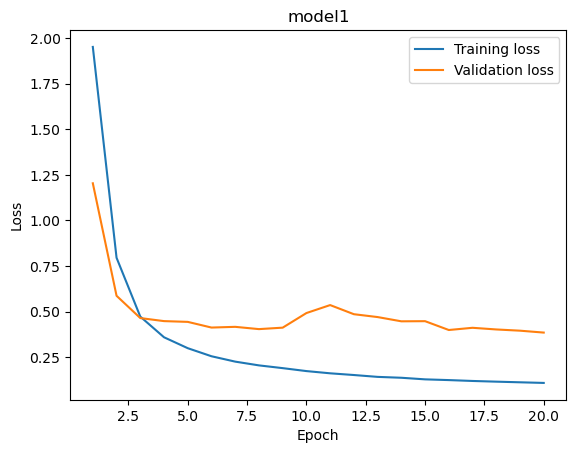

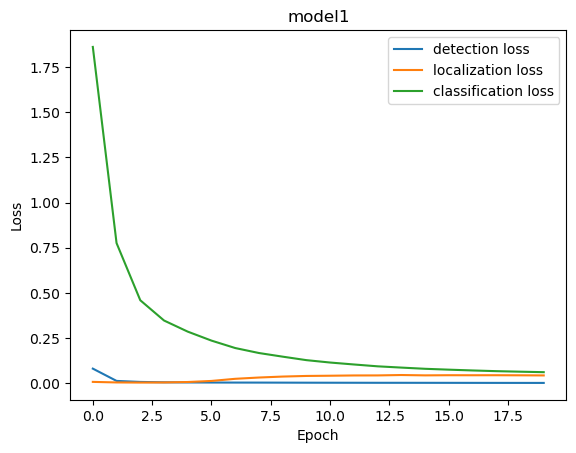

In [11]:
model_name = 'model1'

torch.manual_seed(SEED)
model1 = LocCNN1((48,60,1))
model1.to(device=device, dtype=torch.double)
optimizer = optim.SGD(model1.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train1, loss_val1, train_perform1, val_perform1, losses_separated1 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model1,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train1, loss_val1, model_name, save_model=True)
plot_lists(losses_separated1, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

16:43:24  |  Epoch 1  |  Training loss 2.352
16:43:24  |  Epoch 1  |  Validation loss 1.974
Estimated time left: 6m 52s
16:43:45  |  Epoch 2  |  Training loss 1.714
16:43:45  |  Epoch 2  |  Validation loss 1.189
Estimated time left: 6m 31s
16:44:07  |  Epoch 3  |  Training loss 0.677
16:44:07  |  Epoch 3  |  Validation loss 0.567
Estimated time left: 6m 9s
16:44:29  |  Epoch 4  |  Training loss 0.368
16:44:29  |  Epoch 4  |  Validation loss 0.381
Estimated time left: 5m 47s
16:44:50  |  Epoch 5  |  Training loss 0.263
16:44:50  |  Epoch 5  |  Validation loss 0.280
Estimated time left: 5m 26s
16:45:12  |  Epoch 6  |  Training loss 0.216
16:45:12  |  Epoch 6  |  Validation loss 0.249
Estimated time left: 5m 4s
16:45:34  |  Epoch 7  |  Training loss 0.184
16:45:34  |  Epoch 7  |  Validation loss 0.296
Estimated time left: 4m 42s
16:45:55  |  Epoch 8  |  Training loss 0.173
16:45:55  |  Epoch 8  |  Validation loss 0.230
Estimated time left: 4m 20s
16:46:17  |  Epoch 9  |  Training loss 0.1

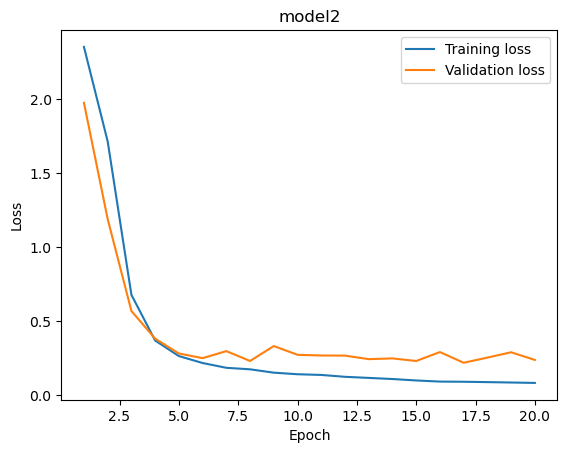

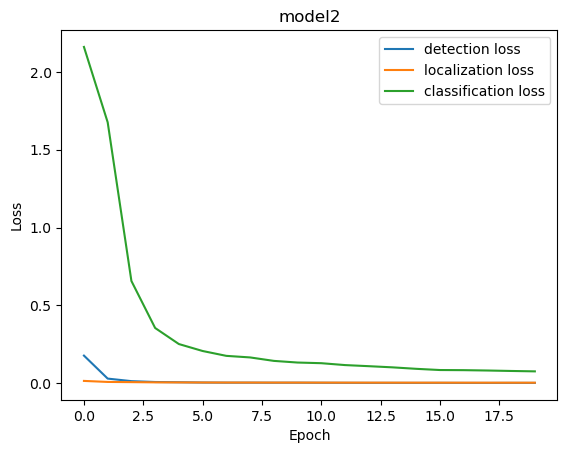

In [12]:
model_name = 'model2'

torch.manual_seed(SEED)
model2 = LocCNN2((48,60,1))
model2.to(device=device)
optimizer = optim.SGD(model2.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train2, loss_val2, train_perform2, val_perform2, losses_separated2 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model2,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train2, loss_val2, model_name, save_model=True)
plot_lists(losses_separated2, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

16:50:40  |  Epoch 1  |  Training loss 2.382
16:50:40  |  Epoch 1  |  Validation loss 2.086
Estimated time left: 6m 54s
16:51:02  |  Epoch 2  |  Training loss 1.972
16:51:02  |  Epoch 2  |  Validation loss 1.724
Estimated time left: 6m 31s
16:51:24  |  Epoch 3  |  Training loss 1.230
16:51:24  |  Epoch 3  |  Validation loss 0.872
Estimated time left: 6m 8s
16:51:45  |  Epoch 4  |  Training loss 0.639
16:51:45  |  Epoch 4  |  Validation loss 0.424
Estimated time left: 5m 46s
16:52:07  |  Epoch 5  |  Training loss 0.439
16:52:07  |  Epoch 5  |  Validation loss 0.330
Estimated time left: 5m 24s
16:52:28  |  Epoch 6  |  Training loss 0.358
16:52:28  |  Epoch 6  |  Validation loss 0.313
Estimated time left: 5m 3s
16:52:50  |  Epoch 7  |  Training loss 0.321
16:52:50  |  Epoch 7  |  Validation loss 0.318
Estimated time left: 4m 41s
16:53:12  |  Epoch 8  |  Training loss 0.282
16:53:12  |  Epoch 8  |  Validation loss 0.277
Estimated time left: 4m 20s
16:53:34  |  Epoch 9  |  Training loss 0.2

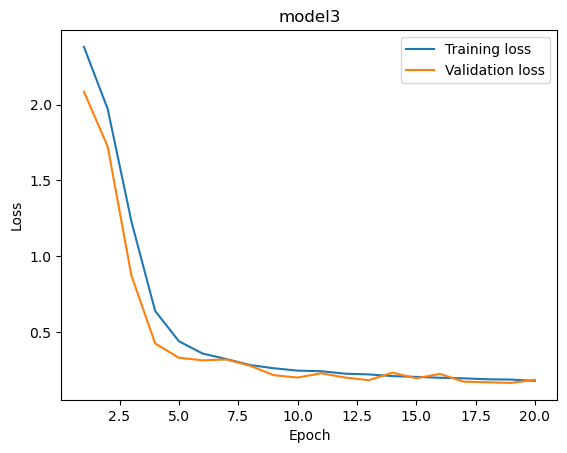

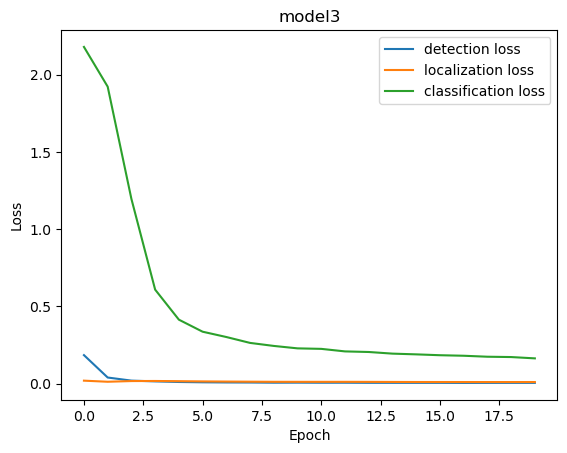

In [13]:
model_name = 'model3'

torch.manual_seed(SEED)
model3 = LocCNN3((48,60,1))
model3.to(device=device)
optimizer = optim.SGD(model3.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train3, loss_val3, train_perform3, val_perform3, losses_separated3 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model3,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train3, loss_val3, model_name, save_model=True)
plot_lists(losses_separated3, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

17:01:46  |  Epoch 1  |  Training loss 2.630
17:01:46  |  Epoch 1  |  Validation loss 2.603
Estimated time left: 16m 18s
17:05:52  |  Epoch 2  |  Training loss 2.385
17:05:52  |  Epoch 2  |  Validation loss 2.117
Estimated time left: 12m 16s
17:09:59  |  Epoch 3  |  Training loss 1.845
17:09:59  |  Epoch 3  |  Validation loss 1.436
Estimated time left: 8m 12s
17:14:08  |  Epoch 4  |  Training loss 0.853
17:14:08  |  Epoch 4  |  Validation loss 0.593
Estimated time left: 4m 7s
17:18:16  |  Epoch 5  |  Training loss 0.434
17:18:16  |  Epoch 5  |  Validation loss 0.410
Estimated time left: 0m 0s
Training performance: [0.9242087542087541, 0.49523469452930635, 0.7097217243690302]
Validation performance:[0.8846969696969696, 0.4913433597283935, 0.6880201647126816]


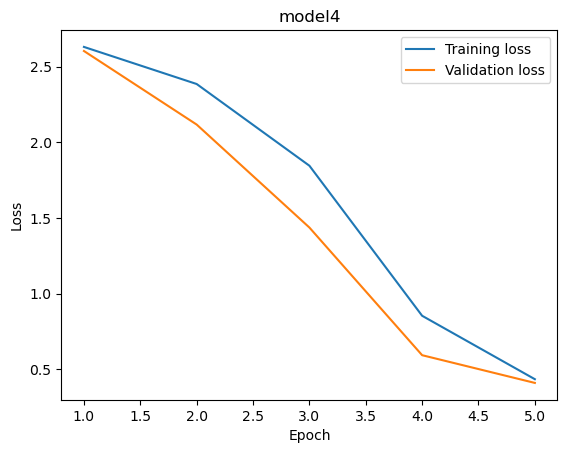

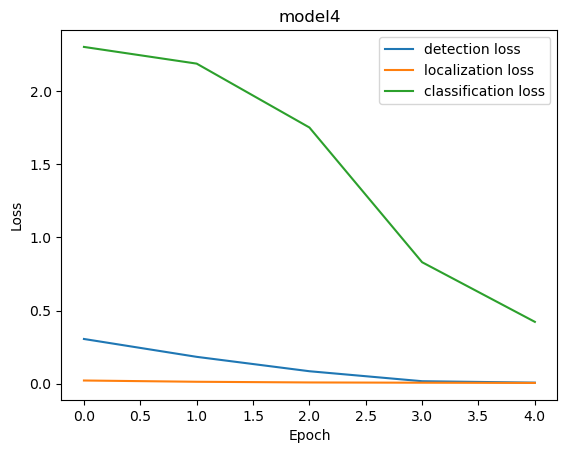

In [14]:
model_name = 'model4'

torch.manual_seed(SEED)
model4 = LocCNN4((48,60,1))
model4.to(device=device)
optimizer = optim.SGD(model4.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

loss_train4, loss_val4, train_perform4, val_perform4, losses_separated4 = train(
    n_epochs=5,
    optimizer=optimizer,
    model=model4,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train4, loss_val4, model_name, save_model=True)
plot_lists(losses_separated4, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

17:19:57  |  Epoch 1  |  Training loss 2.305
17:19:57  |  Epoch 1  |  Validation loss 2.032
Estimated time left: 9m 44s
17:20:27  |  Epoch 2  |  Training loss 1.624
17:20:27  |  Epoch 2  |  Validation loss 0.958
Estimated time left: 9m 13s
17:20:58  |  Epoch 3  |  Training loss 0.782
17:20:58  |  Epoch 3  |  Validation loss 0.549
Estimated time left: 8m 42s
17:21:29  |  Epoch 4  |  Training loss 0.526
17:21:29  |  Epoch 4  |  Validation loss 0.429
Estimated time left: 8m 11s
17:21:59  |  Epoch 5  |  Training loss 0.417
17:21:59  |  Epoch 5  |  Validation loss 0.427
Estimated time left: 7m 41s
17:22:30  |  Epoch 6  |  Training loss 0.361
17:22:30  |  Epoch 6  |  Validation loss 0.368
Estimated time left: 7m 10s
17:23:01  |  Epoch 7  |  Training loss 0.316
17:23:01  |  Epoch 7  |  Validation loss 0.359
Estimated time left: 6m 39s
17:23:32  |  Epoch 8  |  Training loss 0.289
17:23:32  |  Epoch 8  |  Validation loss 0.397
Estimated time left: 6m 8s
17:24:02  |  Epoch 9  |  Training loss 0.

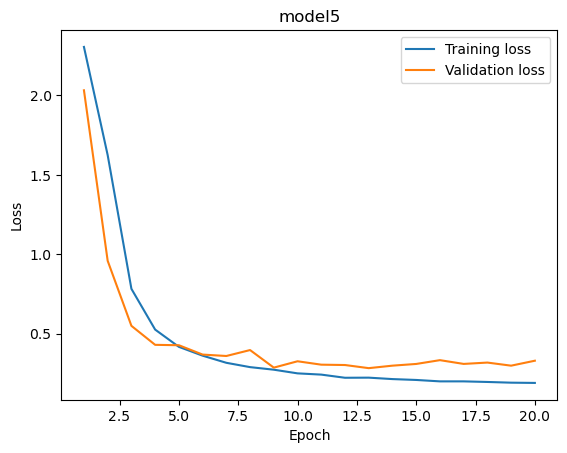

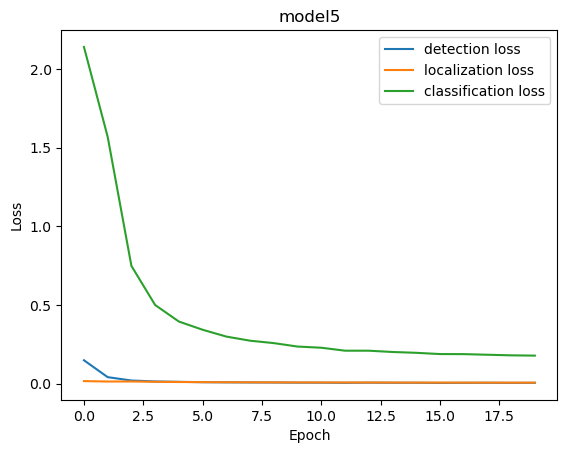

In [15]:
model_name = 'model5'

torch.manual_seed(SEED)
model5 = LocCNN5((48,60,1))
model5.to(device=device)
optimizer = optim.SGD(model5.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train5, loss_val5, train_perform5, val_perform5, losses_separated5 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model5,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train5, loss_val5, model_name, save_model=True)
plot_lists(losses_separated5, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

#### Model Selection

In [16]:
best_model, best_performance = model_selector([model1, model2, model3, model5], [val_perform1,val_perform2,val_perform3,val_perform5])

# Print additional details of the best model
print("Best Model Details\n--------------------------------------------------------------")
print(f"Network architecture/ layout: {best_model}\n")
#print(f"Optimizer Parameters: {best_data.optimizer}")
print(f"Validation Performance: {best_performance}")

Best Model Details
--------------------------------------------------------------
Network architecture/ layout: LocCNN2(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 2), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=384, out_features=100, bias=True)
  (fc2): L

#### Model Evaluation

In [17]:
test_performance = localization_performance(best_model, test_loader)
print(10*'-'+'Test Performance' + 10*'-')
print(f"Test Accuracy: {test_performance[0]}\nTest IOU: {test_performance[1]}\nOverall Performance: {test_performance[2]}")

----------Test Performance----------
Test Accuracy: 0.9508181818181818
Test IOU: 0.5550273397955754
Overall Performance: 0.7529227608068786


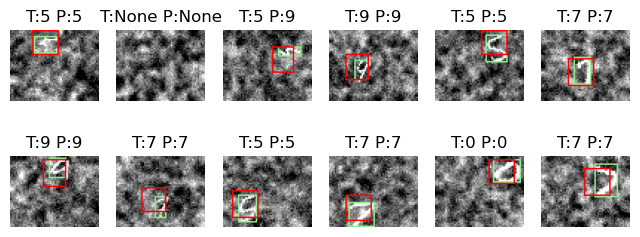

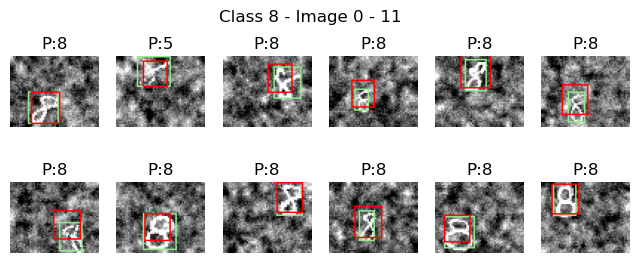

In [18]:
y_true, y_pred = predict(best_model, test_loader)
test_imgs = torch.stack([img for img,_ in loc_test])

plot_localization_data(test_imgs, y_true=y_true, y_preds=y_pred, start_idx=0, save_model=True)
plot_localization_data(test_imgs, y_true=y_true, y_preds=y_pred, class_label=8, start_idx=0, save_model=True)

# 3 Object Detection

#### Loading the data and inspecting the data

In [19]:
import torch
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from torch.utils.data import TensorDataset


from project2_functions import *
from project2_objects import *
from project2_models import *
from project2_constants import DEVICE as device
from project2_constants import SEED

torch.set_default_dtype(torch.double)

In [20]:
train_labels = torch.load('data/list_y_true_train.pt')
val_labels = torch.load('data/list_y_true_val.pt')
test_labels = torch.load('data/list_y_true_test.pt')

In [21]:
print(f'Train label size: {len(train_labels)}')
print(f'Val label size: {len(val_labels)}')
print(f'Test label size: {len(test_labels)}')

Train label size: 26874
Val label size: 2967
Test label size: 4981


In [22]:
train_imgs = torch.load('data/detection_train.pt')
val_imgs = torch.load('data/detection_val.pt')
test_imgs = torch.load('data/detection_test.pt')

In [44]:
print(train_imgs[0][0])

tensor([[[0.3076, 0.2098, 0.5142,  ..., 0.0969, 0.1777, 0.1449],
         [0.3975, 0.2270, 0.2177,  ..., 0.0000, 0.1338, 0.0000],
         [0.2963, 0.3896, 0.2755,  ..., 0.1037, 0.0000, 0.0000],
         ...,
         [0.3741, 0.3321, 0.4604,  ..., 0.1887, 0.0000, 0.0000],
         [0.2101, 0.3359, 0.3832,  ..., 0.2110, 0.1496, 0.0000],
         [0.3251, 0.2166, 0.4339,  ..., 0.0809, 0.0000, 0.1337]]],
       dtype=torch.float32)


In [45]:
print(train_imgs[0][1])

tensor([[[1.0000, 0.7750, 0.8125, 0.3500, 0.7917, 1.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [1.0000, 0.9500, 0.3333, 0.7000, 0.6667, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],
       dtype=torch.float32)


In [48]:
print(type(train_labels))

<class 'list'>


In [47]:
for each in train_labels[0]:
    
    print(each)

tensor([1.0000, 0.2583, 0.4062, 0.1167, 0.3958, 1.0000], dtype=torch.float32)
tensor([1.0000, 0.6500, 0.6667, 0.2333, 0.3333, 0.0000], dtype=torch.float32)


In [23]:
train_labels_local = prepare_labels(train_labels, (2,3,6))
val_labels_local = prepare_labels(val_labels, (2,3,6))
test_labels_local = prepare_labels(test_labels, (2,3,6))

In [52]:
train_labels_local[0]

tensor([[[1.0000, 0.0000, 0.0000],
         [0.0000, 1.0000, 0.0000]],

        [[0.7750, 0.0000, 0.0000],
         [0.0000, 0.9500, 0.0000]],

        [[0.8125, 0.0000, 0.0000],
         [0.0000, 0.3333, 0.0000]],

        [[0.3500, 0.0000, 0.0000],
         [0.0000, 0.7000, 0.0000]],

        [[0.7917, 0.0000, 0.0000],
         [0.0000, 0.6667, 0.0000]],

        [[1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]]])

In [24]:
det_train = merge_datasets(train_imgs, train_labels_local)
det_val = merge_datasets(val_imgs, val_labels_local)
det_test = merge_datasets(test_imgs, test_labels_local)

#### Plotting some images from the detection dataset

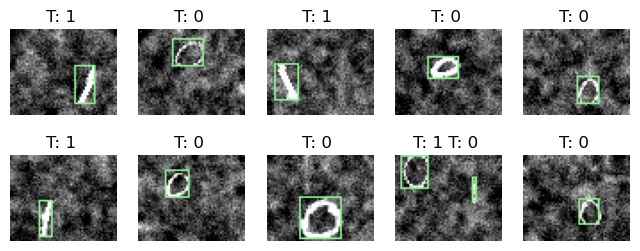

In [25]:
imgs = [img for img,_ in train_imgs]
plot_detection_data(imgs, train_labels, start_idx=10)

#### Normalizing the dataset TBD

In [26]:
det_train_norm, det_val_norm, det_test_norm = normalizer(det_train, det_val, det_test)

In [27]:
train_loader = torch.utils.data.DataLoader(det_train_norm, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(det_val_norm, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(det_test_norm, batch_size=64, shuffle=False)

loss_fn = DetectionLoss()

#### Defining models

In [28]:
train_loader = torch.utils.data.DataLoader(det_train_norm, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(det_val_norm, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(det_test_norm, batch_size=batch_size, shuffle=False)

loss_fn = DetectionLoss()

17:30:16  |  Epoch 1  |  Training loss 1.208
17:30:16  |  Epoch 1  |  Validation loss 0.726
Estimated time left: 2m 39s
17:30:24  |  Epoch 2  |  Training loss 0.347
17:30:24  |  Epoch 2  |  Validation loss 0.225
Estimated time left: 2m 28s
17:30:32  |  Epoch 3  |  Training loss 0.154
17:30:32  |  Epoch 3  |  Validation loss 0.106
Estimated time left: 2m 19s
17:30:40  |  Epoch 4  |  Training loss 0.092
17:30:40  |  Epoch 4  |  Validation loss 0.082
Estimated time left: 2m 10s
17:30:48  |  Epoch 5  |  Training loss 0.069
17:30:48  |  Epoch 5  |  Validation loss 0.080
Estimated time left: 2m 2s
17:30:56  |  Epoch 6  |  Training loss 0.056
17:30:56  |  Epoch 6  |  Validation loss 0.073
Estimated time left: 1m 53s
17:31:04  |  Epoch 7  |  Training loss 0.050
17:31:04  |  Epoch 7  |  Validation loss 0.066
Estimated time left: 1m 45s
17:31:12  |  Epoch 8  |  Training loss 0.045
17:31:12  |  Epoch 8  |  Validation loss 0.063
Estimated time left: 1m 37s
17:31:20  |  Epoch 9  |  Training loss 0.

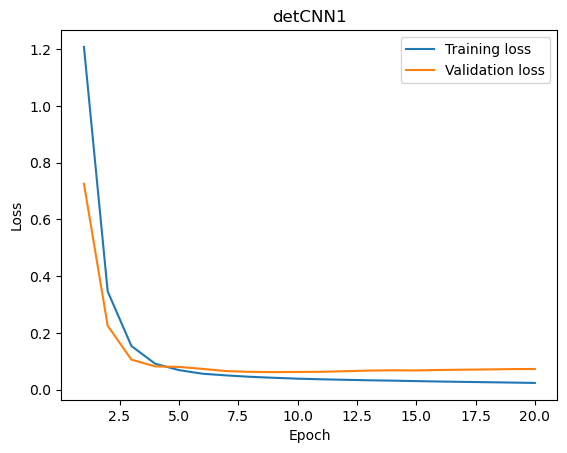

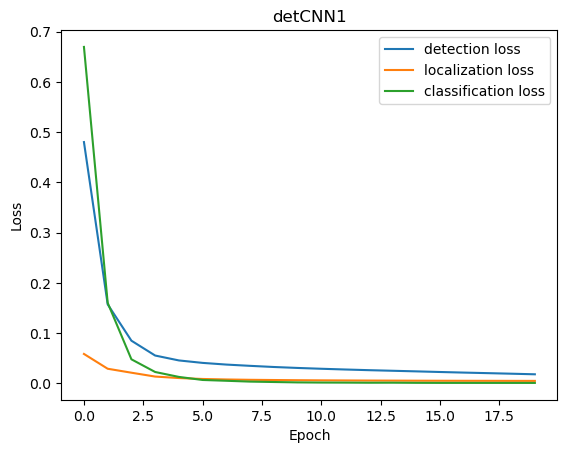

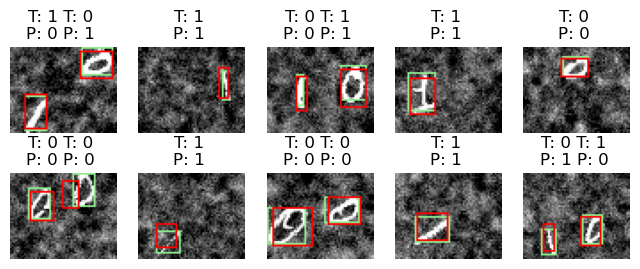

In [29]:
model_name = 'detCNN1'
torch.manual_seed(SEED)
modelcnn1 = DetCNN1()
modelcnn1.to(device=device)
optimizer = optim.SGD(modelcnn1.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train1, loss_val1, train_performance1, val_performance1, losses_separated1 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=modelcnn1,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=detection_performance
)

plot_loss(loss_train1, loss_val1, model_name, save_model=True)
plot_lists(losses_separated1, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)
y_true, y_pred = predict(modelcnn1, val_loader, binary_class=True)
imgs = [img for img,_ in val_imgs]
y_pred_reshaped = y_pred.permute(0,2,3,1)
y_pred_global = local_to_global_list(y_pred_reshaped)
plot_detection_data(imgs, val_labels, y_pred_global, start_idx=10)

17:33:36  |  Epoch 1  |  Training loss 0.783
17:33:36  |  Epoch 1  |  Validation loss 0.210
Estimated time left: 3m 47s
17:33:48  |  Epoch 2  |  Training loss 0.141
17:33:48  |  Epoch 2  |  Validation loss 0.103
Estimated time left: 3m 33s
17:33:59  |  Epoch 3  |  Training loss 0.087
17:33:59  |  Epoch 3  |  Validation loss 0.086
Estimated time left: 3m 21s
17:34:11  |  Epoch 4  |  Training loss 0.069
17:34:11  |  Epoch 4  |  Validation loss 0.077
Estimated time left: 3m 9s
17:34:23  |  Epoch 5  |  Training loss 0.063
17:34:23  |  Epoch 5  |  Validation loss 0.069
Estimated time left: 2m 57s
17:34:35  |  Epoch 6  |  Training loss 0.055
17:34:35  |  Epoch 6  |  Validation loss 0.064
Estimated time left: 2m 45s
17:34:46  |  Epoch 7  |  Training loss 0.051
17:34:46  |  Epoch 7  |  Validation loss 0.062
Estimated time left: 2m 33s
17:34:58  |  Epoch 8  |  Training loss 0.048
17:34:58  |  Epoch 8  |  Validation loss 0.059
Estimated time left: 2m 21s
17:35:10  |  Epoch 9  |  Training loss 0.

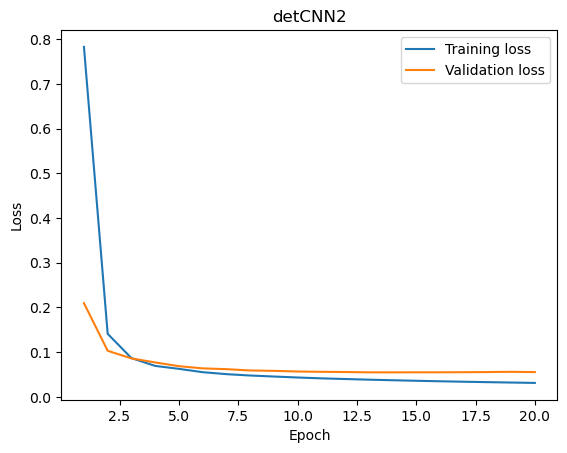

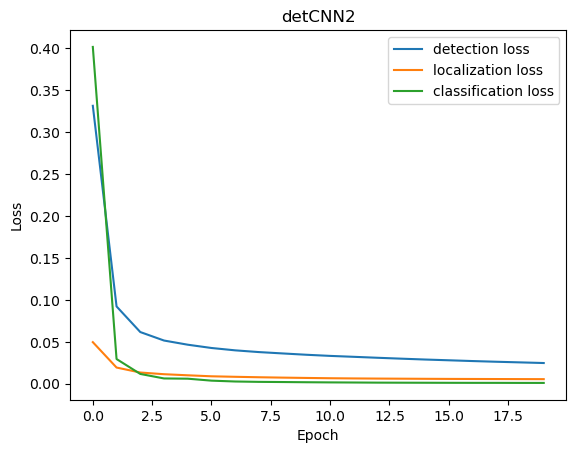

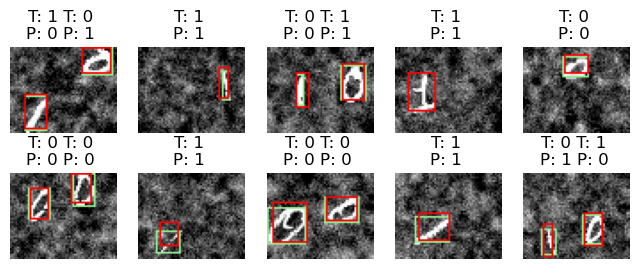

In [30]:
model_name = 'detCNN2'
torch.manual_seed(SEED)
modelcnn2 = DetCNN2()
modelcnn2.to(device=device)
optimizer = optim.SGD(modelcnn2.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train2, loss_val2, train_performance2, val_performance2, losses_separated2 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=modelcnn2,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=detection_performance
)

plot_loss(loss_train2, loss_val2, model_name, save_model=True)
plot_lists(losses_separated2, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)
y_true, y_pred = predict(modelcnn2, val_loader, binary_class=True)
imgs = [img for img,_ in val_imgs]
y_pred_reshaped = y_pred.permute(0,2,3,1)
y_pred_global = local_to_global_list(y_pred_reshaped)
plot_detection_data(imgs, val_labels, y_pred_global, start_idx=10)

#### Model Selection

In [31]:
best_model, best_performance = model_selector([modelcnn1, modelcnn2], [val_performance1,val_performance2])

# Print additional details of the best model
print("Best Model Details\n--------------------------------------------------------------")
print(f"Network architecture/ layout: {best_model}\n")
print(f"Validation Performance: {best_performance}")

Best Model Details
--------------------------------------------------------------
Network architecture/ layout: DetCNN1(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 2), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(32, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

#### Model Evaluation

In [32]:
test_performance = detection_performance(best_model, test_loader)
print(10*'-'+'Test Performance' + 10*'-')
print(f"Mean Average Precision: {test_performance[-1]}")

----------Test Performance----------
Mean Average Precision: 0.9074488210573656


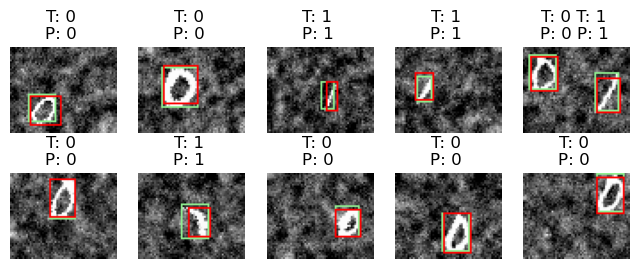

In [42]:
_, y_pred = predict(best_model, test_loader,binary_class=True)
test_imgs = torch.stack([img for img,_ in det_test])
y_pred_reshaped = y_pred.permute(0,2,3,1)
y_pred_global = local_to_global_list(y_pred_reshaped)

plot_detection_data(test_imgs, y_true=test_labels, y_pred=y_pred_global, start_idx=10, save_model=True)